# Advanced Lane Finding

In [9]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Camera Calibration

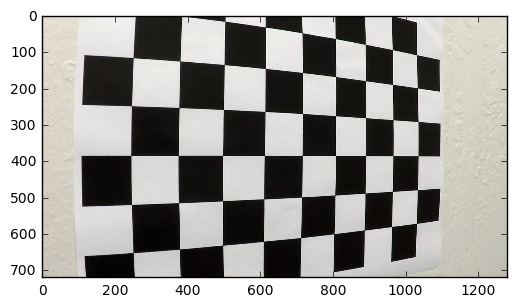

In [28]:
list_images = glob.glob('camera_cal/*')
img_chess = mpimg.imread(list_images[12])
plt.imshow(img_chess)

In [23]:
obj_points = []
img_points = []

nx = 9
ny = 6
objp = np.zeros((nx*ny,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)
for im_path in list_images:
    img = mpimg.imread(im_path)
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray,(nx,ny),None)
    if ret:
        img_points.append(corners)
        obj_points.append(objp)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)


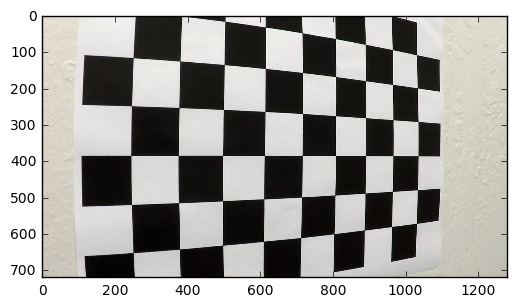

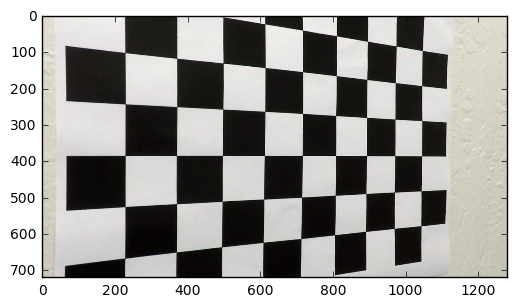

In [27]:
undist = cv2.undistort(img_chess, mtx, dist, None, mtx)
plt.figure()
plt.imshow(img_chess)
plt.figure()
plt.imshow(undist)

## Binarization of images using gradients and color transformation